In [1]:
import pandas as pd
import matplotlib.pyplot as plt

action              banned  picked
heroes                            
Abaddon                  9      18
Alchemist                9      16
Ancient Apparition      11      16
Anti-Mage               88      47
Arc Warden              73      28
...                    ...     ...
Windranger              43      44
Winter Wyvern            5      28
Witch Doctor             7      50
Wraith King              1      14
Zeus                    10      32

[123 rows x 2 columns]


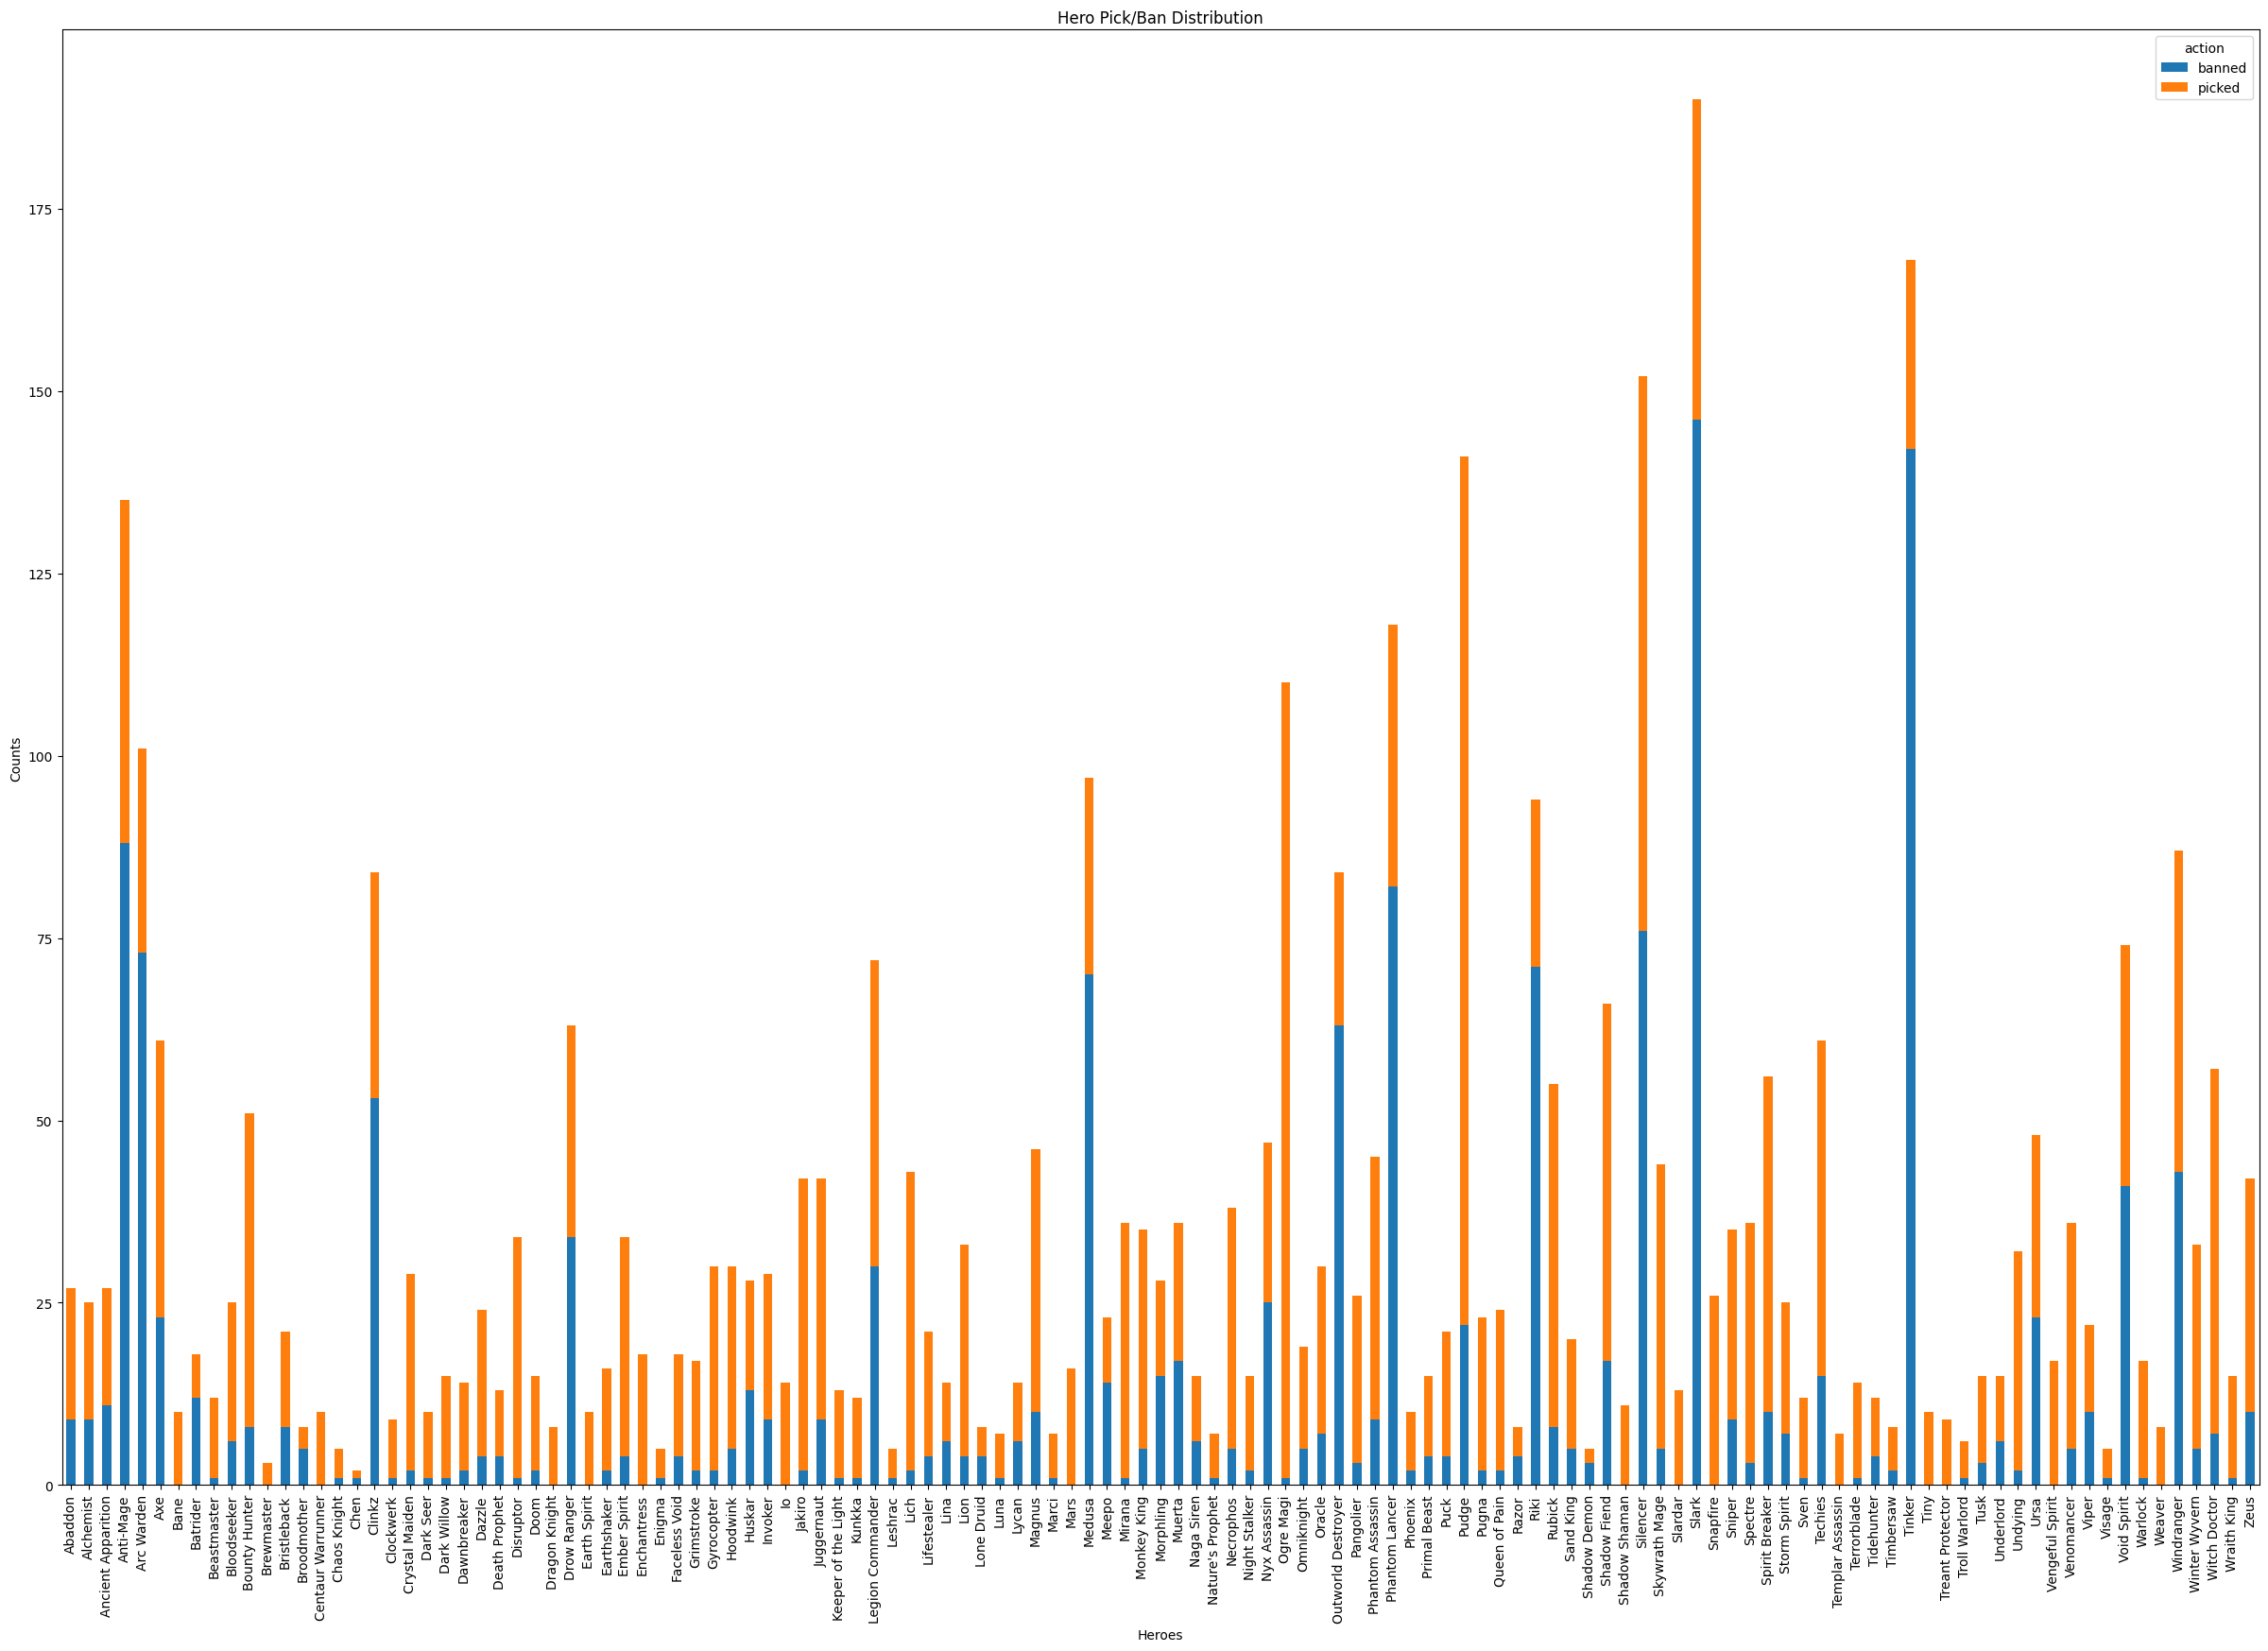

In [27]:
# Read in the data
df = pd.read_csv('data/merged.csv')

# Converting the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filtering the dataframe
df = df[df['date'] >= '2023-03-03']


# Split the 'picks' and 'bans' columns
df_picks = df['picks'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('heroes')
df_bans = df['bans'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('heroes')

# Append a column to both dataframes to mark whether the heroes were picked or banned
df_picks = df_picks.to_frame().assign(action='picked')
df_bans = df_bans.to_frame().assign(action='banned')

# Concatenate the two dataframes
df_heroes = pd.concat([df_picks, df_bans])

# Calculate the number of times each hero was picked and banned
df_hero_counts = df_heroes.groupby(['heroes', 'action']).size().unstack(fill_value=0)

# Now you can view the data
print(df_hero_counts)

# Plotting the data
df_hero_counts.plot(kind='bar', stacked=True, figsize=(30, 20))
plt.title('Hero Pick/Ban Distribution')
plt.xlabel('Heroes')
plt.ylabel('Counts')
plt.show()


action          banned  picked  total
heroes                               
Slark              146      44    190
Tinker             142      26    168
Silencer            76      76    152
Pudge               22     119    141
Anti-Mage           88      47    135
Phantom Lancer      82      36    118
Ogre Magi            1     109    110
Arc Warden          73      28    101
Medusa              70      27     97
Riki                71      23     94


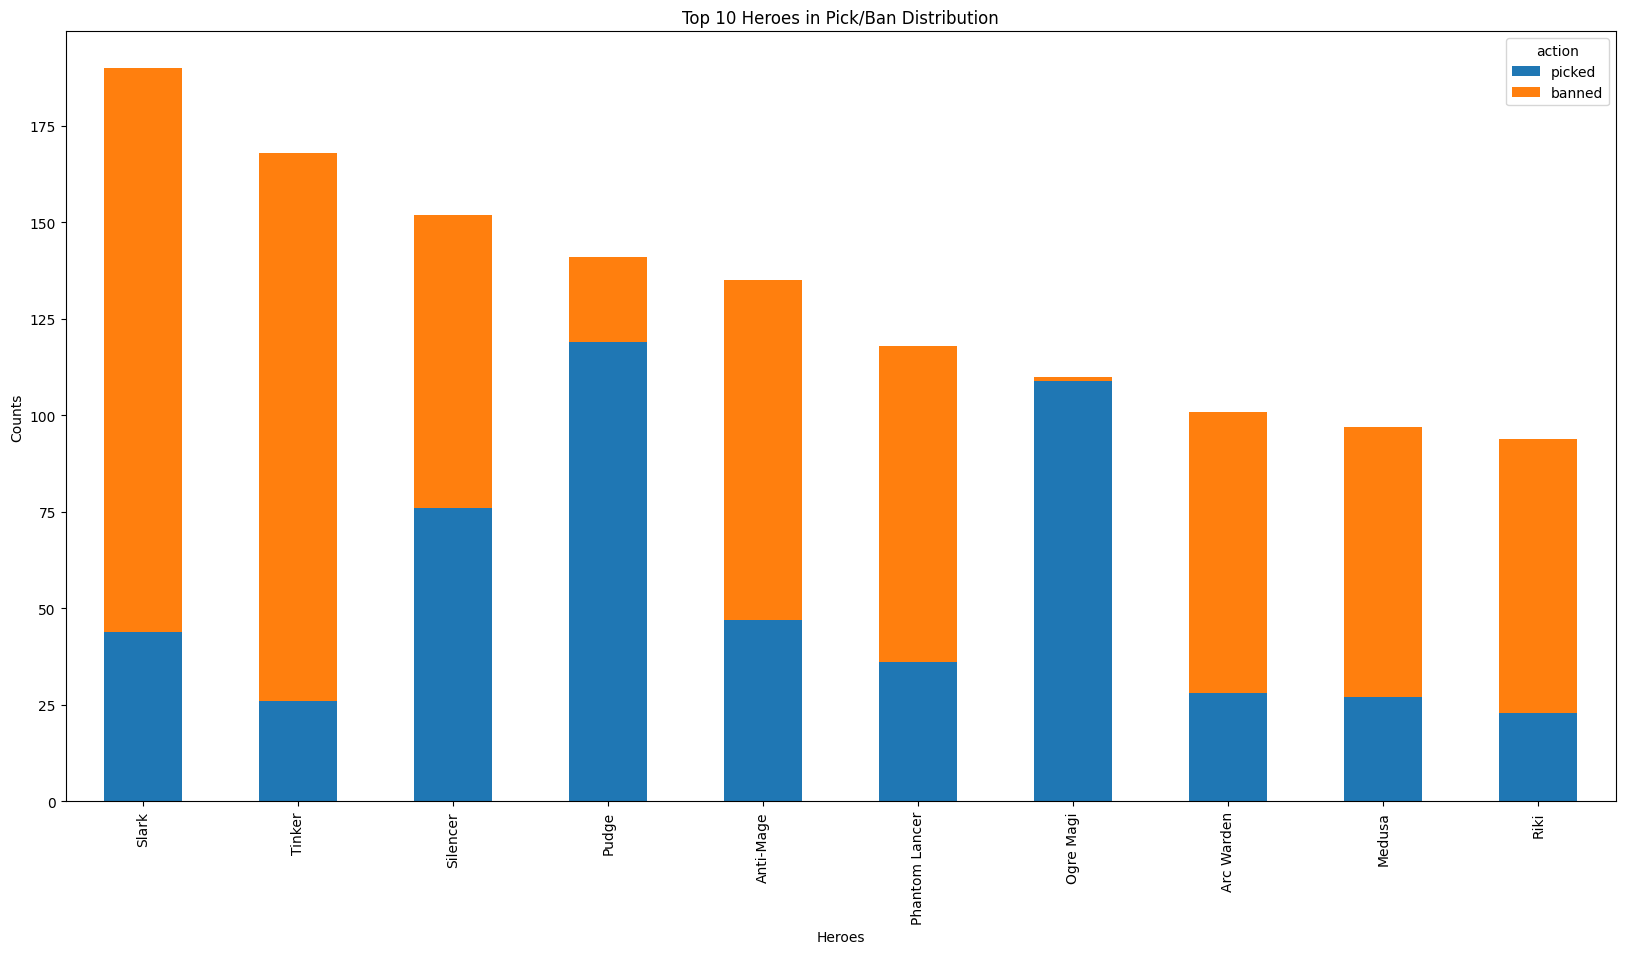

In [28]:
# Calculate the total counts for each hero
df_hero_counts['total'] = df_hero_counts.sum(axis=1)

# Sort by total count and take the top 10
df_top10 = df_hero_counts.sort_values('total', ascending=False).head(10)

# View the top 10
print(df_top10)

# Plotting the top 10
df_top10[['picked', 'banned']].plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Top 10 Heroes in Pick/Ban Distribution')
plt.xlabel('Heroes')
plt.ylabel('Counts')
plt.show()


action            banned  picked  total   ban_rate
heroes                                            
Pudge                 22     119    141   8.560311
Ogre Magi              1     109    110   0.389105
Silencer              76      76    152  29.571984
Witch Doctor           7      50     57   2.723735
Shadow Fiend          17      49     66   6.614786
Anti-Mage             88      47    135  34.241245
Rubick                 8      47     55   3.112840
Techies               15      46     61   5.836576
Spirit Breaker        10      46     56   3.891051
Slark                146      44    190  56.809339
Windranger            43      44     87  16.731518
Bounty Hunter          8      43     51   3.112840
Legion Commander      30      42     72  11.673152
Lich                   2      41     43   0.778210
Jakiro                 2      40     42   0.778210
Skywrath Mage          5      39     44   1.945525
Axe                   23      38     61   8.949416
Phantom Assassin       9      3

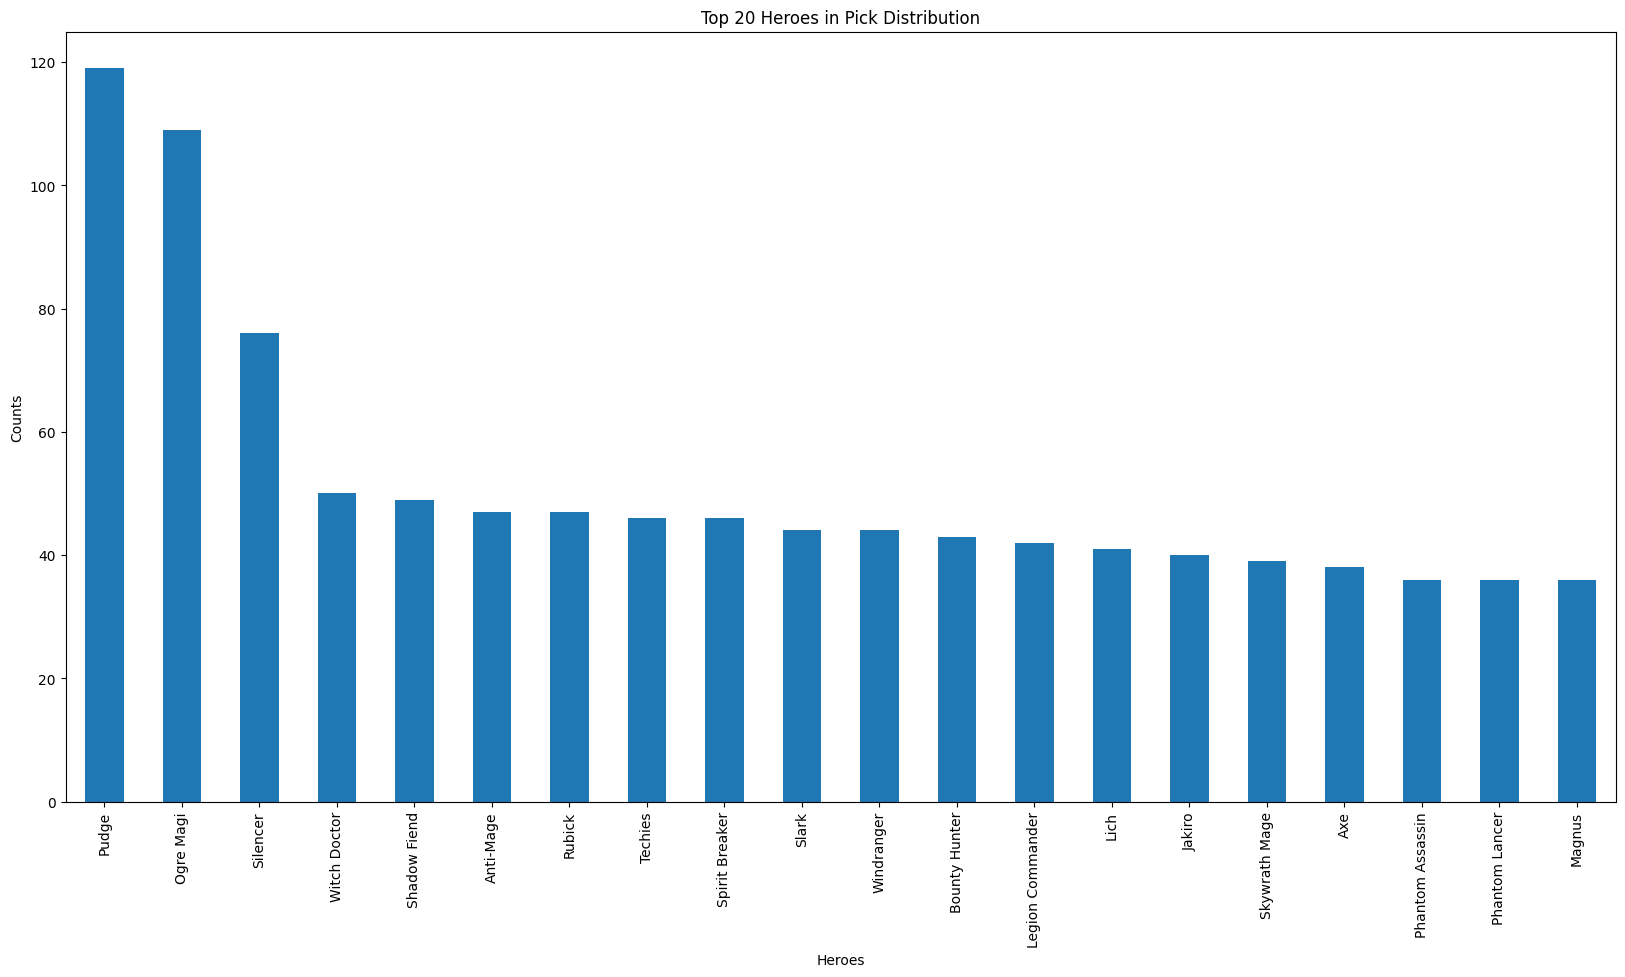

In [32]:
# Sort by picked count and take the top 20
df_top20_picked = df_hero_counts.sort_values('picked', ascending=False).head(20)

# View the top 20
print(df_top20_picked)

# Plotting the top 20
df_top20_picked['picked'].plot(kind='bar', figsize=(20, 10))
plt.title('Top 20 Heroes in Pick Distribution')
plt.xlabel('Heroes')
plt.ylabel('Counts')
plt.show()


action              banned  picked  total   ban_rate
heroes                                              
Slark                  146      44    190  56.809339
Tinker                 142      26    168  55.252918
Anti-Mage               88      47    135  34.241245
Phantom Lancer          82      36    118  31.906615
Silencer                76      76    152  29.571984
Arc Warden              73      28    101  28.404669
Riki                    71      23     94  27.626459
Medusa                  70      27     97  27.237354
Outworld Destroyer      63      21     84  24.513619
Clinkz                  53      31     84  20.622568
Windranger              43      44     87  16.731518
Void Spirit             41      33     74  15.953307
Drow Ranger             34      29     63  13.229572
Legion Commander        30      42     72  11.673152
Nyx Assassin            25      22     47   9.727626
Ursa                    23      25     48   8.949416
Axe                     23      38     61   8.

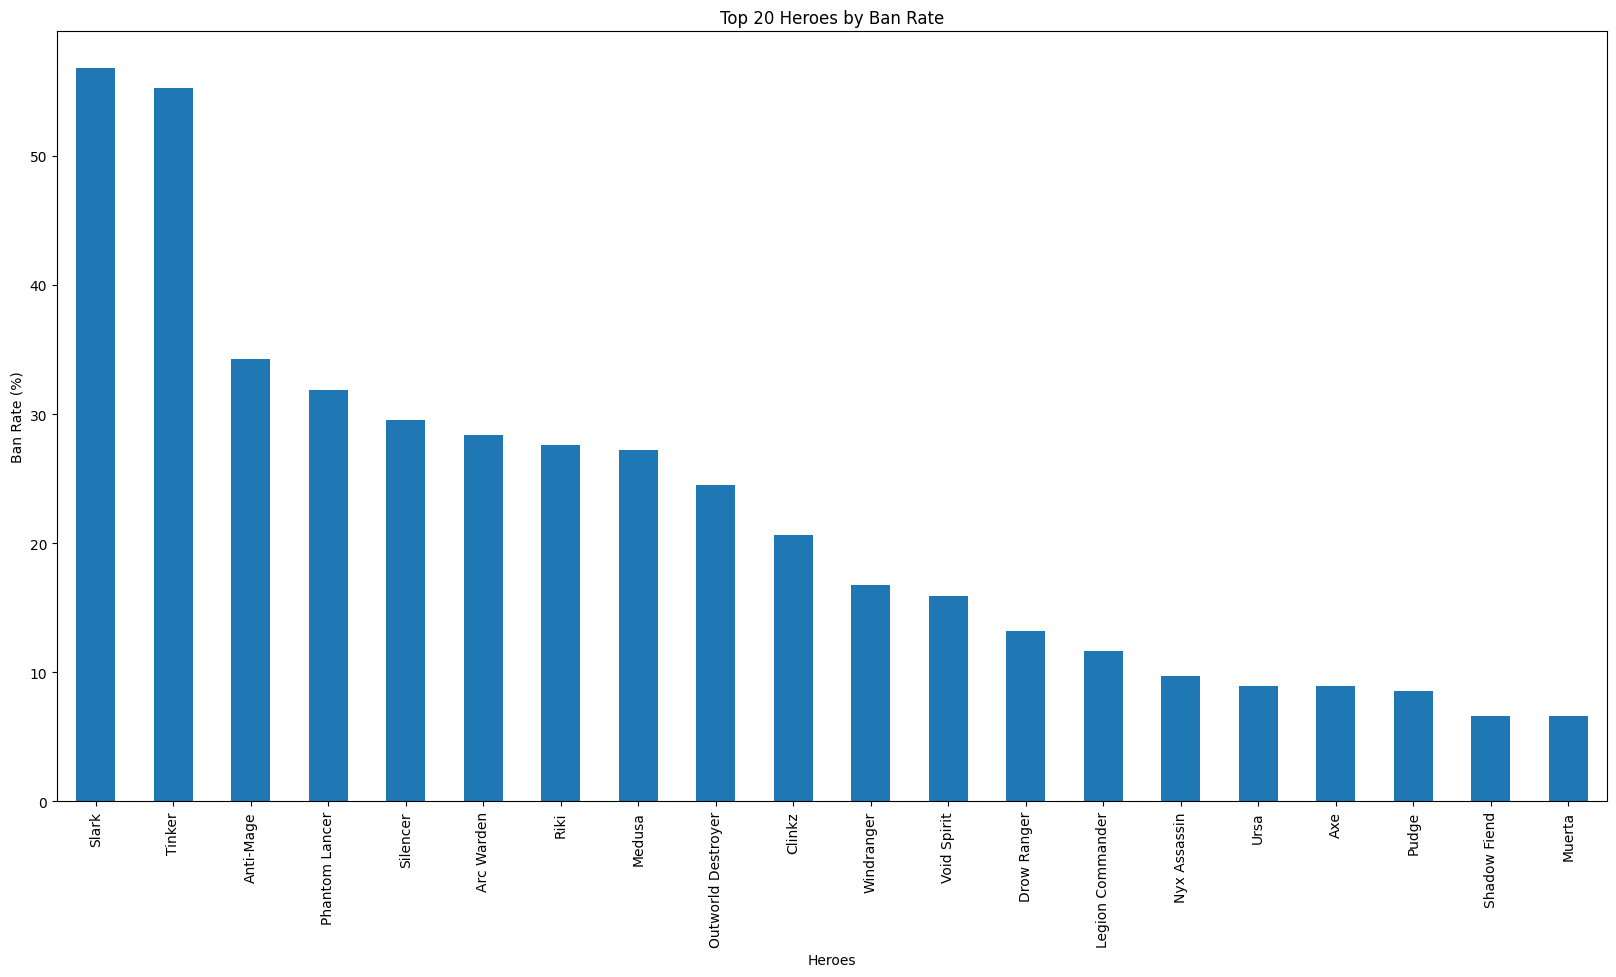

In [33]:
# Assuming total_matches has the total number of matches
total_matches = len(df) 

# Calculate ban rate
df_hero_counts['ban_rate'] = df_hero_counts['banned'] / total_matches * 100

# Now let's sort and get the top 20 heroes with the highest ban rate
df_top20_ban_rate = df_hero_counts.sort_values('ban_rate', ascending=False).head(20)

# View the top 20
print(df_top20_ban_rate)

# Plotting the top 20
df_top20_ban_rate['ban_rate'].plot(kind='bar', figsize=(20, 10))
plt.title('Top 20 Heroes by Ban Rate')
plt.xlabel('Heroes')
plt.ylabel('Ban Rate (%)')
plt.show()



In [31]:
# 7.32 + 7.33 banrate 
# total_bans = 613 + 2196 + 19189 + 27341 + 10437 + 630 + 2938
# total_matches = 38740 + 153611 + 333145 + 497021 + 228236 + 26455 + 142069

# 7.33 banrate 
total_bans = 630 + 2938
total_matches = 26455 + 142069

banrate = total_bans / total_matches
banrate

0.021172058579193468